## Southern Oregon and California Attractions Overview

<div style="text-align: center;"><img src="map-1.jpg" alt="map-1" width="241" height="356"></div>

### Attractions distance table (unit: miles)

|                    | Crater Lake | Redwood | Lassen Volcano | Pinnacles | Kings Canyon | Sequoia | Death Valley | Joshua Tree | San Diego |
|:------------------:|:-----------:|:-------:|:--------------:|:---------:|:------------:|:-------:|:------------:|:-----------:|:---------:|
| **Crater Lake**    |      0      |   179   |      224       |    518    |      580     |   604   |      619     |     853     |    868    |
| **Redwood**        |      \      |    0    |      214       |    431    |      541     |   565   |      662     |     814     |    810    |
| **Lassen Volcano** |      \      |    \    |       0        |    339    |      402     |   426   |      458     |     675     |    690    |
| **Pinnacles**      |      \      |    \    |       \        |     0     |      195     |   169   |      347     |     398     |    388    |
| **Kings Canyon**   |      \      |    \    |       \        |     \     |       0      |    11   |      310     |     349     |    364    |
| **Sequoia**        |      \      |    \    |       \        |     \     |       \      |    0    |      273     |     311     |    324    |
| **Death Valley**   |      \      |    \    |       \        |     \     |       \      |    \    |       0      |     227     |    282    |
| **Joshua Tree**    |      \      |    \    |       \        |     \     |       \      |    \    |       \      |      0      |    164    |
| **San Diego**      |      \      |    \    |       \        |     \     |       \      |    \    |       \      |      \      |     0     |

### Airports-attractions distance table (unit: miles)

| Airport | Crater Lake | Redwood | Lassen Volcano | Pinnacles | Kings Canyon | Sequoia | Death Valley | Joshua Tree | San Diego |
|:-------:|:-----------:|:-------:|:--------------:|:---------:|:------------:|:-------:|:------------:|:-----------:|:---------:|
| **SFO** |     409     |   357   |      247       |    112    |      241     |   265   |      456     |     508     |    497    |
| **LAX** |     738     |   720   |      576       |    277    |      249     |   212   |      224     |     148     |    124    |
| **LAS** |     728     |   892   |      561       |    449    |      411     |   375   |      105     |     182     |    327    |

### Method 1: Enumeration

- Time complexity is $O(n! \cdot n)$

In [1]:
import itertools

def get_dist(graph, path):
    dist = 0
    for i in range(len(path)-1):
        dist += graph[path[i]][path[i+1]]
    # Return to the starting node
    dist += graph[path[-1]][path[0]]
    return dist

def tsp(graph):
    # Generate all permutations of nodes (except the starting node 0)
    nodes = list(range(1, len(graph)))
    min_dist = float('inf')
    best_path = None
    
    for perm in itertools.permutations(nodes):
        # Create a full path starting and ending at node 0
        cur_path = [0] + list(perm)
        cur_dist = get_dist(graph, cur_path)
        
        if cur_dist < min_dist:
            min_dist = cur_dist
            best_path = cur_path
    
    return min_dist, best_path

### Method 2: Dynamic Programming

- The "mask" set is represented in binary
- dp[v][new_mask] = min(dp[u][mask] + graph[u][v])
- Time complexity is $O(2^n \cdot n^2)$

In [2]:
def tsp_dp(graph):
    n = len(graph)
    
    # Initialize memoization table
    dp = [[float('inf')] * (1 << n) for _ in range(n)]
    dp[0][1] = 0  # Start at node 0 with only node 0 visited
    
    # Precompute the paths for reconstruction
    path = [[-1] * (1 << n) for _ in range(n)]
    
    # Fill in the dp table
    for mask in range(1 << n):
        for u in range(n):
            # If node u is not included in the current mask, skip to the next iteration
            if not (mask & (1 << u)):
                continue
            
            # Try to go to a new node v (not included in the mask) from u
            for v in range(n):
                # Exclude already visited node v
                if mask & (1 << v):
                    continue
                
                # Update the mask of visited nodes including node v
                new_mask = mask | (1 << v)
                
                # Calculate the total distance to reach v
                new_dist = dp[u][mask] + graph[u][v]
                
                # Update the dp table if found a shorter path to reach v
                if new_dist < dp[v][new_mask]:
                    dp[v][new_mask] = new_dist
                    path[v][new_mask] = u
    
    # Find the minimum distance
    min_dist = float('inf')
    final_mask = (1 << n) - 1  # All nodes visited
    last_node = -1
    for u in range(1, n):
        dist = dp[u][final_mask] + graph[u][0]  # Return to starting node
        if dist < min_dist:
            min_dist = dist
            last_node = u
    
    # Reconstruct the path
    short_path = []
    mask = final_mask
    for _ in range(n):
        short_path.append(last_node)
        next_node = path[last_node][mask]
        mask ^= (1 << last_node) # Remove last_node from the set of visited nodes
        last_node = next_node  
    short_path = [short_path[-1]] + short_path[:-1]
    
    return min_dist, short_path

### Main Function

In [9]:
# Determine the starting node
Airport = 'LAS'

np_dic = {'Crater Lake':1, 'Redwood':2, 'Lassen Volcano':3,
          'Pinnacles':4, 'Kings Canyon':5, 'Sequoia':6,
          'Death Valley':7, 'Joshua Tree':8, 'San Diego':9}

np_dic[Airport] = 0

graph = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 179, 224, 518, 580, 604, 619, 853, 868],
         [0, 0, 0, 214, 431, 541, 565, 662, 814, 810],
         [0, 0, 0, 0, 339, 402, 426, 458, 675, 690],
         [0, 0, 0, 0, 0, 195, 169, 347, 398, 388],
         [0, 0, 0, 0, 0, 0, 11, 310, 349, 364],
         [0, 0, 0, 0, 0, 0, 0, 273, 311, 324],
         [0, 0, 0, 0, 0, 0, 0, 0, 227, 282],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 164],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

if Airport == 'SFO':
    graph[0] = [0, 409, 357, 247, 112, 241, 265, 456, 508, 497]
elif Airport == 'LAX':
    graph[0] = [0, 738, 720, 576, 277, 249, 212, 224, 148, 124]
else:
    graph[0] = [0, 728, 892, 561, 449, 411, 375, 105, 182, 327]

for i in range(len(graph)):
    for j in range(i+1, len(graph)):
        graph[j][i] = graph[i][j]

### Scenario 1: Start from San Francisco (SFO)

In [4]:
min_dist, short_path = tsp(graph)
best_path = [key for value in short_path for key, val in np_dic.items() if val == value]
print("Shortest path:", best_path)
print("Minimum distance:", min_dist)

Shortest path: ['SFO', 'Redwood', 'Crater Lake', 'Lassen Volcano', 'Death Valley', 'Joshua Tree', 'San Diego', 'Sequoia', 'Kings Canyon', 'Pinnacles']
Minimum distance: 2251


In [5]:
min_dist, short_path = tsp_dp(graph)
best_path = [key for value in short_path for key, val in np_dic.items() if val == value]
print("Shortest path:", best_path)
print("Minimum distance:", min_dist)

Shortest path: ['SFO', 'Redwood', 'Crater Lake', 'Lassen Volcano', 'Death Valley', 'Joshua Tree', 'San Diego', 'Sequoia', 'Kings Canyon', 'Pinnacles']
Minimum distance: 2251


### Scenario 2: Start from Los Angeles (LAX)

In [7]:
min_dist, short_path = tsp(graph)
best_path = [key for value in short_path for key, val in np_dic.items() if val == value]
print("Shortest path:", best_path)
print("Minimum distance:", min_dist)

Shortest path: ['LAX', 'Sequoia', 'Kings Canyon', 'Pinnacles', 'Redwood', 'Crater Lake', 'Lassen Volcano', 'Death Valley', 'Joshua Tree', 'San Diego']
Minimum distance: 2225


In [8]:
min_dist, short_path = tsp_dp(graph)
best_path = [key for value in short_path for key, val in np_dic.items() if val == value]
print("Shortest path:", best_path)
print("Minimum distance:", min_dist)

Shortest path: ['LAX', 'Sequoia', 'Kings Canyon', 'Pinnacles', 'Redwood', 'Crater Lake', 'Lassen Volcano', 'Death Valley', 'Joshua Tree', 'San Diego']
Minimum distance: 2225


### Scenario 3: Start from Las Vegas (LAS)

In [10]:
min_dist, short_path = tsp(graph)
best_path = [key for value in short_path for key, val in np_dic.items() if val == value]
print("Shortest path:", best_path)
print("Minimum distance:", min_dist)

Shortest path: ['LAS', 'Death Valley', 'Lassen Volcano', 'Crater Lake', 'Redwood', 'Pinnacles', 'Kings Canyon', 'Sequoia', 'San Diego', 'Joshua Tree']
Minimum distance: 2273


In [11]:
min_dist, short_path = tsp_dp(graph)
best_path = [key for value in short_path for key, val in np_dic.items() if val == value]
print("Shortest path:", best_path)
print("Minimum distance:", min_dist)

Shortest path: ['LAS', 'Death Valley', 'Lassen Volcano', 'Crater Lake', 'Redwood', 'Pinnacles', 'Kings Canyon', 'Sequoia', 'San Diego', 'Joshua Tree']
Minimum distance: 2273


### Best Route

<div style="text-align: center;"><img src="map-2.jpg" alt="map-2" width="241" height="356"></div>

### Time Complexity Comparison

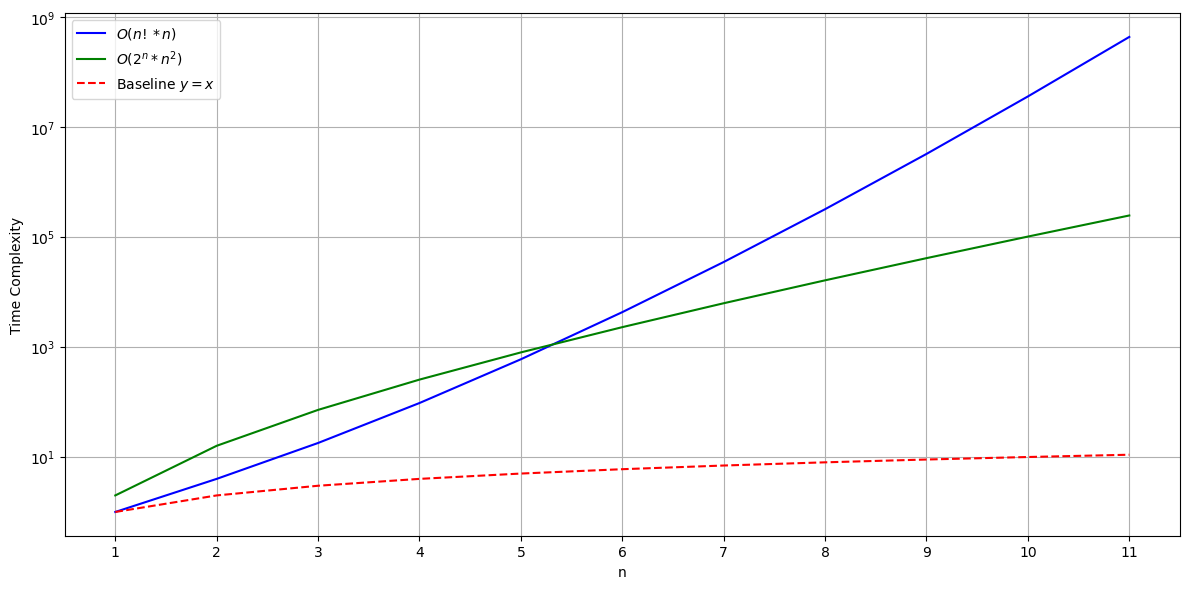

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 12)
y1 = [math.factorial(i) * i for i in x]
y2 = [2**i * i**2 for i in x]

plt.figure(figsize=(12, 6))

plt.plot(x, y1, label=r'$O(n!*n)$', color='blue')
plt.plot(x, y2, label=r'$O(2^n*n^2)$', color='green')
plt.plot(x, x, label=r'Baseline $y=x$', linestyle='--', color='red')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Time Complexity')
plt.xticks(x)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()